# 数值解析在量子力学一维势阱模型中束缚态特性研究

#### 作者：14

一维薛定谔方程：
$$i\hbar\frac{\partial\Psi}{\partial t} =-\frac{\hbar^2}{2m}\frac{\partial^2  \Psi}{\partial x^2} +V\Psi$$
因式分解，波函数分为空间部分和时间部分：
$$ \Psi (x,t) = \psi(x)f(t) $$
$$f(t)=e^{-iEt/\hbar}$$
$$ \frac{-\hbar^2}{2m}\frac{\partial^2\psi}{\partial x^2} +V\psi=E\psi$$
有限差分方法(FDM)中用于近似二阶偏导数的三点模板
对 $\psi_{i+1}$,$\psi_{i-1}$ 进行泰勒展开
在有限差分方法中，我们常常使用泰勒展开的前几项来近似函数的导数
$$ \psi(x_{i+1})=\psi(x_i)+\psi'(x_i) (\Delta x) + \frac12\psi''(x_i)(\Delta x)^2 +O((\Delta x)^3) $$
$$ \psi(x_{i-1})=\psi(x_i)-\psi'(x_i) (\Delta x) + \frac12\psi''(x_i)(\Delta x)^2 -O((\Delta x)^3) $$
上面两式相加
$$ \psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})=\psi''(x_i)(\Delta x)^2+O((\Delta x)^3) $$
$$ \psi''(x_i)=\frac{\psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})}{(\Delta x)^2}-\frac{O((\Delta x)^3)}{(\Delta x)^2}=\frac{\psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})}{(\Delta x)^2}-O(\Delta x) $$
$$ \psi''(x_i)\approx \frac{\psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})}{(\Delta x)^2} $$
$\Delta x$越小，数据越精准
所以有:
$$ \frac{\partial^2 \psi_{i}}{\partial x^2}=\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{(\Delta x)^2} $$ 
将上式代入薛定谔方程
$$ -\frac{\hbar^2}{2m}(\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{(\Delta x)^2})+V_i\psi_i=E\psi_i $$
$$ -\frac{1}{2(\Delta x)^2}(\psi_{i-1} +(-2-(\frac{2m}{\hbar^2}(\Delta x)^2V_i))\psi_i+\psi_{i+1})=\frac{m}{\hbar^2}E\psi_i$$
$$ -\frac{1}{2(\Delta x)^2}\psi_{i-1}+\frac{1}{(\Delta x)^2}\psi_i +\frac{m}{\hbar^2} V_i\psi_i -\frac{1}{2(\Delta x)^2}\psi_{i+1}=\frac{m}{\hbar^2}E\psi_i $$
为数值分析更为方便精确，这里我们替换为无量纲形式：$\Delta y=\frac{\Delta x}{L},\hbar=1$，即：
$$-\frac{1}{2(\Delta y)^2}\psi_{i-1}+\frac{1}{(\Delta y)^2}\psi_i +mL^2 V_i\psi_i -\frac{1}{2(\Delta y)^2}\psi_{i+1}=mL^2E\psi_i$$
写成矩阵形式，此处使用无限深方势阱的边界条件$\psi_0=0,\psi_N=0$，后续把势能调高以模拟无限深方势阱的情况
$$
\begin{bmatrix}
\frac{1}{(\Delta y)^2}+mL^2V_1 & -\frac{1}{2(\Delta y)^2} & 0 & \cdots & 0 \\
-\frac{1}{2(\Delta y)^2} & \frac{1}{(\Delta y)^2}+mL^2V_2&-\frac{1}{2(\Delta y)^2} &\cdots & 0\\
0 &-\frac{1}{2(\Delta y)^2} & \frac{1}{(\Delta y)^2}+mL^2V_3&\cdots &0\\
\vdots & \vdots & \vdots & \ddots&\vdots\\
0&\cdots&0 &-\frac{1}{2(\Delta y)^2} & \frac{1}{(\Delta y)^2}+mL^2V_{N-1}\\
\end{bmatrix}
\begin{bmatrix}
\psi_1\\
\psi_2\\
\cdots\\
\psi_{N-1}\\
\end{bmatrix}
=mL^2E
\begin{bmatrix}
\psi_1\\
\psi_2\\
\cdots\\
\psi_{N-1}\\
\end{bmatrix}
$$
可知$$\hat H=\hat T +\hat V$$
所以动能算符
$$\hat T=
-\frac{1}{2(\Delta y)^2}
\begin{bmatrix}
-2&1&0&\cdots&0\\
1&-2&1&\cdots&0\\
0&1&-2&\cdots&0\\
\vdots & \vdots & \vdots & \ddots&\vdots\\
0&\cdots&1&-2&1\\
0&\cdots&\cdots&1&-2\\
\end{bmatrix}
$$
$$ \hat V=mL^2
\begin {bmatrix}
V_1&0&0&\cdots&0\\
0&V_2&0&\cdots&0\\
0&0&V_3&\cdots&0\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
0&\cdots&\cdots&0&V_{N-1}\\
\end{bmatrix}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [3]:
def solve_and_plot(potential_func,N=2000,dx=1.0/2000):
    """
    封装函数,由参数中引入势能,解决一维薛定谔方程并作图
    
    参数：
    potential_func:势能函数,接收一个numpy数组并返回一个相同长度的numpy数组
    N:离散点个数
    dx:离散步长
    
    """
    # 初始化x坐标，引入势能
    x=np.linspace(0,1,N+1)
    V=potential_func(x)
    print(f'x坐标离散点分布为:{x}')
    print(f'x坐标离散点个数为:{len(x)}')
    
    # 计算矩阵元素
    d=1/dx**2+potential_func(x)[1:-1]
    e=-1/(2*dx**2)*np.ones(len(d)-1)
    
    # 解特征值问题获取能级和波函数
    w,v=eigh_tridiagonal(d,e)
    
    # 作图
    # 势能图
    plt.figure(figsize=(10, 4))
    plt.plot(x, V, label='Potential V(x)')
    plt.title('Potential')
    plt.xlabel('x')
    plt.ylabel('V(x)')
    plt.show()
    
     # 波函数图
    plt.figure(figsize=(10, 4))
    for i in range(8):  # 绘制前四个态
        plt.plot(x[1:-1],v.T[i], label=f'{i}th state')
    plt.title('Wavefunctions')
    plt.xlabel('dx')
    plt.ylabel('psi(x)')
    plt.legend()
    plt.show()
    
    # 概率密度图
    plt.figure(figsize=(10, 4))
    for i in range(8):  # 绘制前四个态的概率密度
        plt.plot(x[1:-1],v.T[i]**2, label=f'{i}th state')
    plt.title('Probability densities')
    plt.xlabel('dx')
    plt.ylabel('|psi(x)|^2')
    plt.legend()
    plt.show()
    
      # 能级图
    plt.figure(figsize=(10, 4))
    plt.bar(np.arange(0,10,1), w[:10])
    plt.title('Eigenvalues')
    plt.xlabel('n')
    plt.ylabel('Energy')
    # 添加虚线，添加能级数值
    for i in range(10):
        plt.axhline(w[i], color='black', linestyle='--', linewidth=0.5)
        plt.text(i-0.5, w[i], f'{w[i]:.2f}', fontsize=8)
    # 输出能级差
    for i in range(9):
        print(f'第{i+1}个能级差为{w[i+1]-w[i]}')
    plt.show()
    
    # 检查前10个波函数的正交性
    A=np.zeros((10,10))
    for i in range(10):
        for j in range(10):
            A[i,j]=sum(v[:,i]*v[:,j])
    plt.imshow(A)
    plt.colorbar()
    plt.title('Orthogonality')
    plt.xlabel('i')
    plt.ylabel('j')
    plt.show()
    

x坐标离散点分布为:[0.000e+00 5.000e-04 1.000e-03 ... 9.990e-01 9.995e-01 1.000e+00]
x坐标离散点个数为:2001


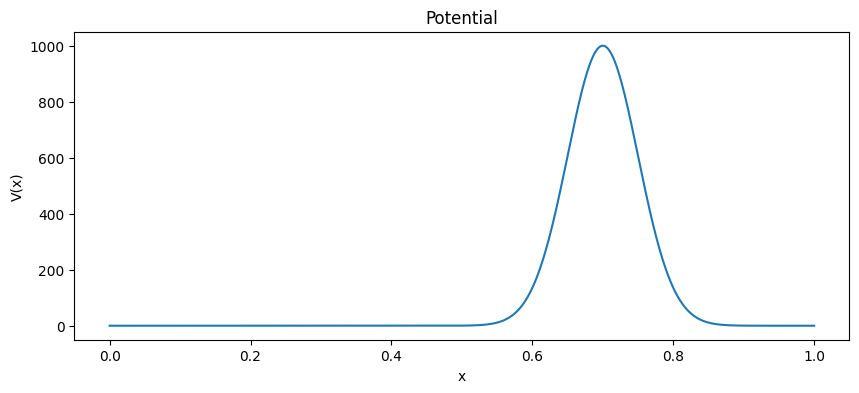

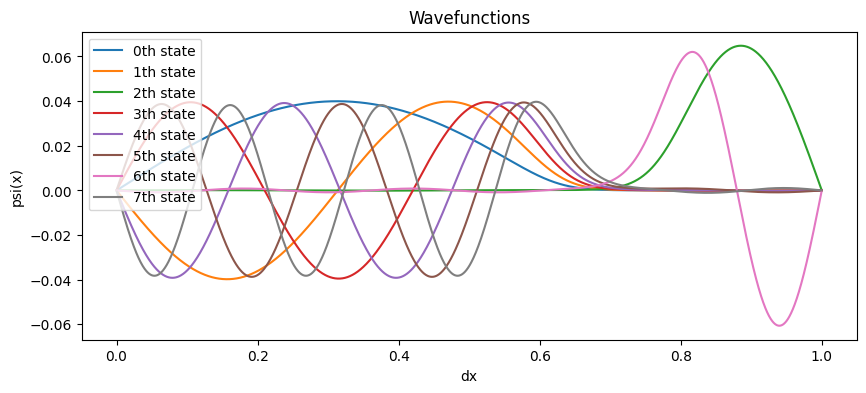

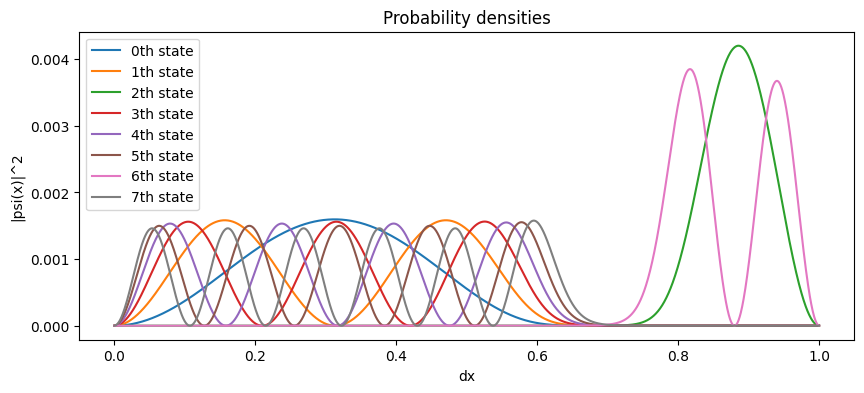

第1个能级差为37.56472244591324
第2个能级差为43.71144538003355
第3个能级差为17.969107008369505
第4个能级差为84.52151751134964
第5个能级差为105.76578747509672
第6个能级差为38.424389407134925
第7个能级差为86.80082110612688
第8个能级差为142.3856471045778
第9个能级差为104.5288995932699


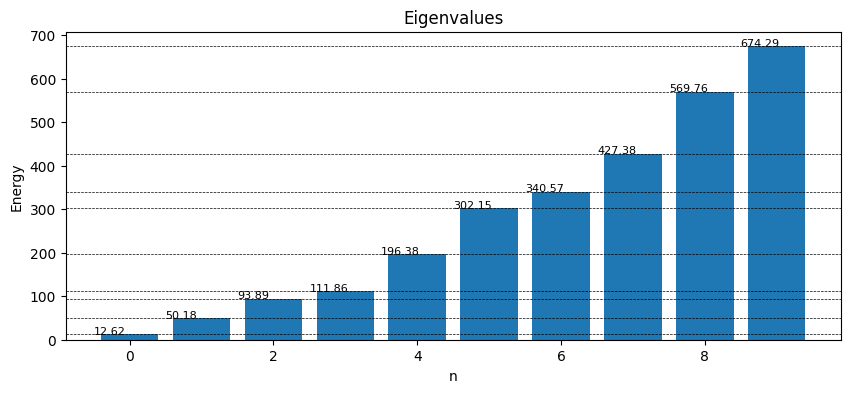

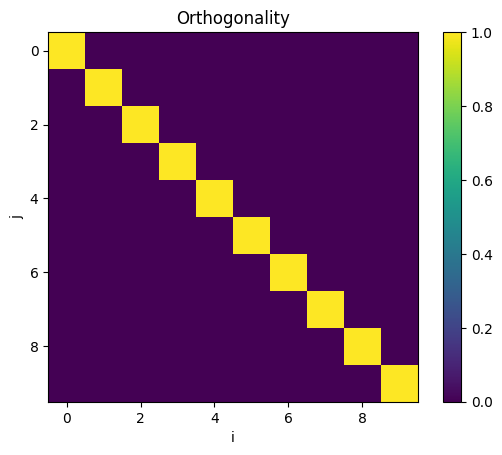

In [18]:
# 高斯函数模拟Delta势阱
def Gaussian_approximation(x):
    return 1000*np.exp(-(x-0.7)**2/(2*0.05**2))

solve_and_plot(Gaussian_approximation)

x坐标离散点分布为:[0.000e+00 5.000e-04 1.000e-03 ... 9.990e-01 9.995e-01 1.000e+00]
x坐标离散点个数为:2001


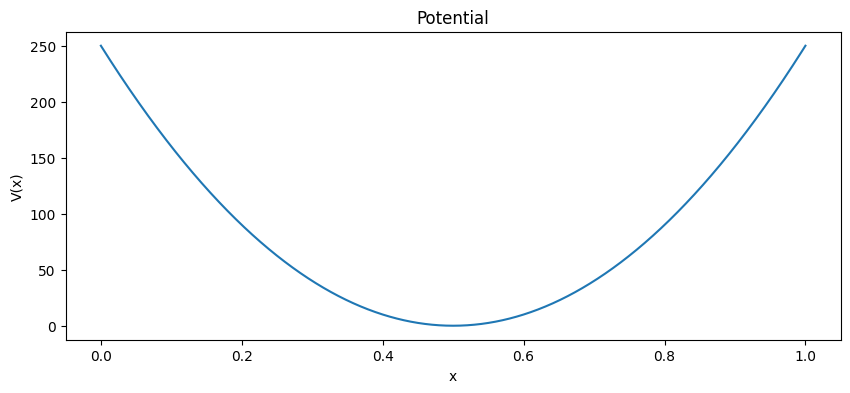

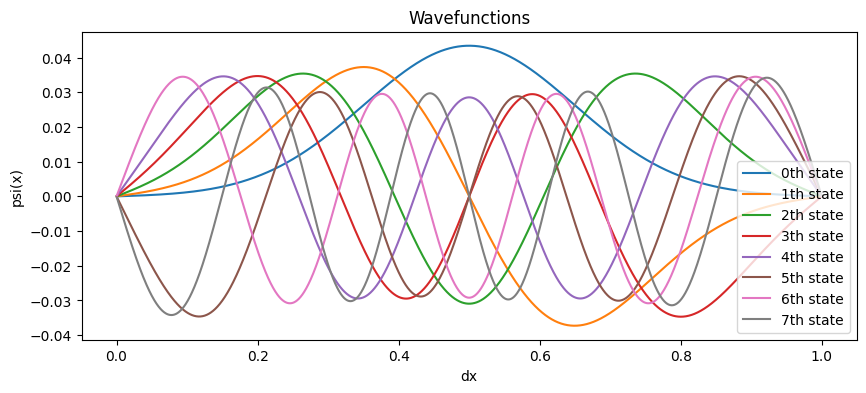

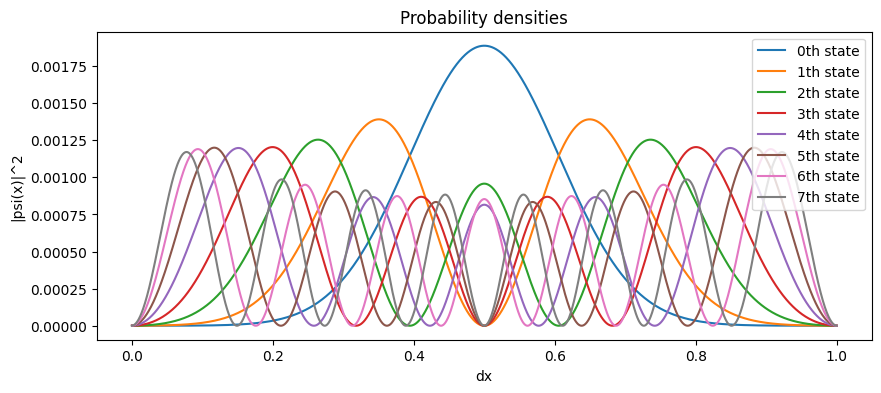

第1个能级差为44.763681729871976
第2个能级差为45.071743082331054
第3个能级差为46.379578683655296
第4个能级差为49.81320506079069
第5个能级差为55.9463294343426
第6个能级差为64.21925367398359
第7个能级差为73.61251549108437
第8个能级差为83.42365111571849
第9个能级差为93.34991150711863


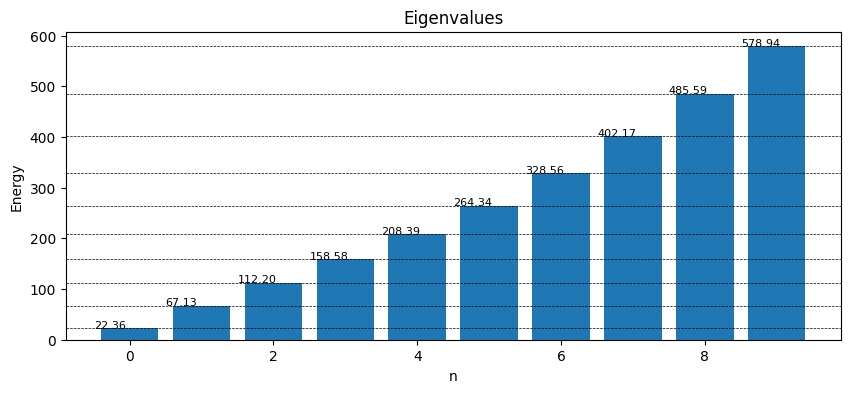

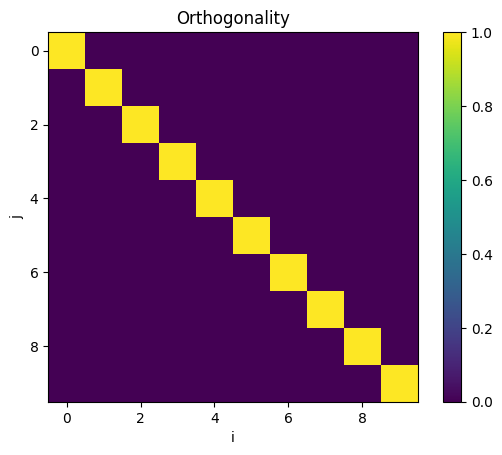

In [5]:
# 谐振子势阱
def Harmonic_Potential(x):
    return 1000*(x-1/2)**2
solve_and_plot(Harmonic_Potential)

x坐标离散点分布为:[0.000e+00 5.000e-04 1.000e-03 ... 9.990e-01 9.995e-01 1.000e+00]
x坐标离散点个数为:2001


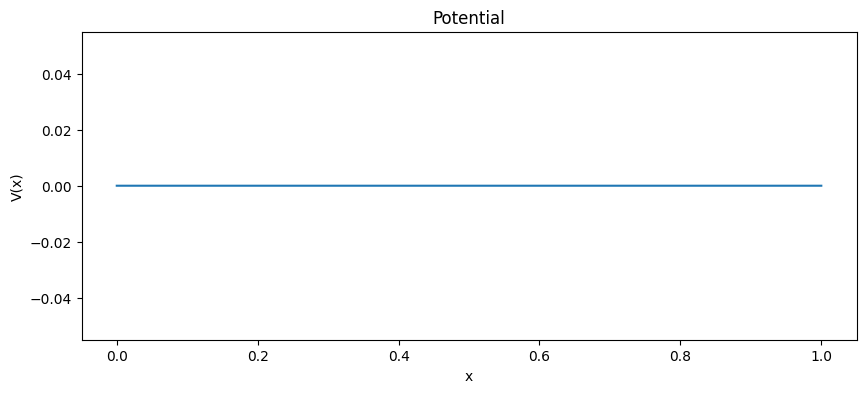

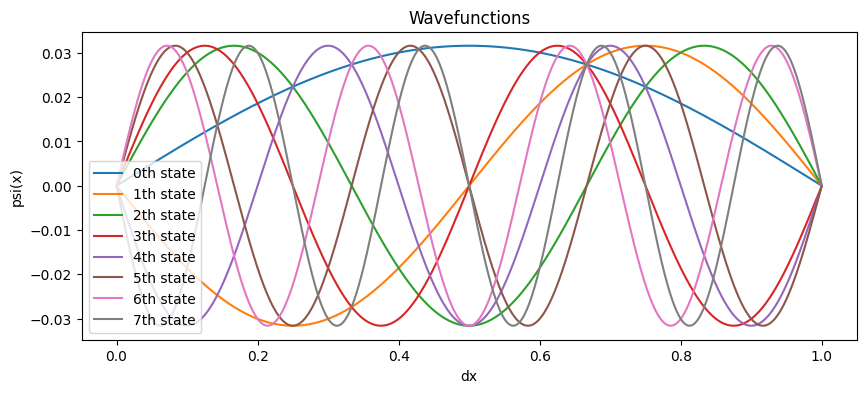

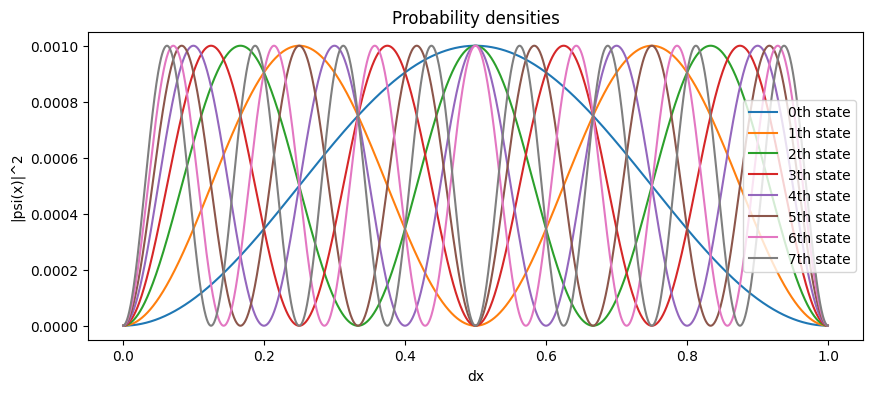

第1个能级差为14.804391381586175
第2个能级差为24.673945048849106
第3个能级差为34.54343783515877
第4个能级差为44.41284538988761
第5个能级差为54.2821433598569
第6个能级差为64.15130739369246
第7个能级差为74.0203131408386
第8个能级差为83.88913625008945
第9个能级差为93.75775237187611


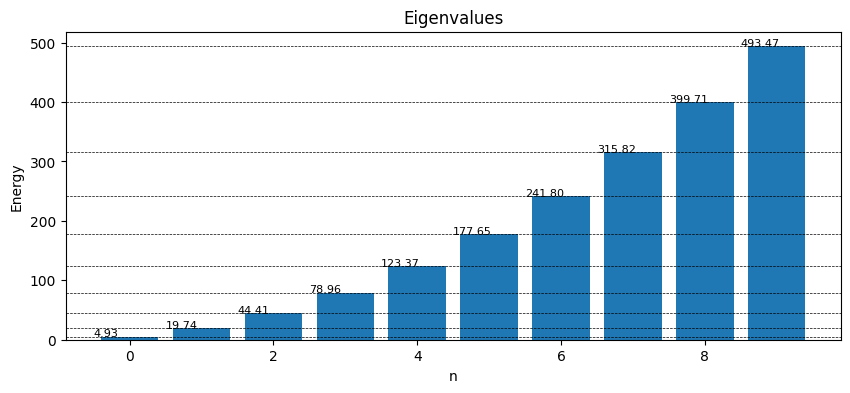

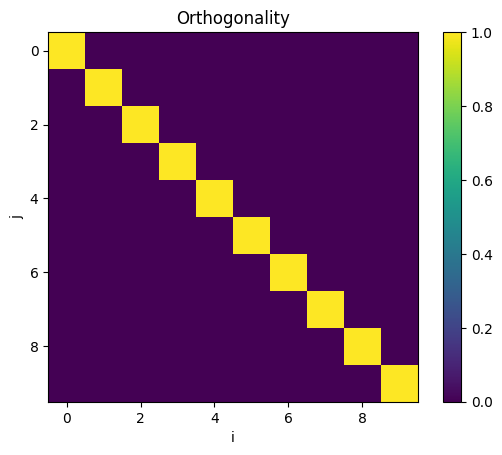

In [6]:
# Infinite square well
def Infinite_Square_Well(x):
    return 0*x
solve_and_plot(Infinite_Square_Well)

## 结论
在本研究中，我们通过数值方法解析了一维薛定谔方程，专注于量子力学中一维势阱模型中束缚态的特性。利用有限差分方法（FDM），我们成功地将薛定谔方程从连续形式转化为离散形式，并应用于不同的势能模型，包括delta势和谐振子势能。我们的结果显示，所采用的数值方法能够有效地预测量子系统中的能级和波函数形态，为理解量子系统的微观行为提供了重要的数值洞察。

### 项目概述：一维定态薛定谔方程在高斯函数模拟势垒下的数值解及性质。
#### 研究背景：无限深势阱是量子力学中一个经典的理论模型，代表了理想化的粒子束缚状态。然而，通过在该模型中加入高斯函数模拟的Delta势垒，可以使模型更接近于实际量子系统的行为。这一改进对于研究量子点、纳米结构以及某些特殊量子阱结构中粒子的行为尤为重要，因为它们经常遭遇到类似Delta势垒的局部势能变化。此研究旨在通过数值方法探究此类模拟势垒对量子态的影响，进而提供对类似系统中量子现象更深刻的理解。
#### 数值分析方法：本研究采用差分法对一维薛定谔方程进行数值求解，通过构建三对角矩阵对动能算符和势能算符进行离散化。这种方法允许我们精确计算量子粒子在势垒存在时的能量本征值和对应的本征函数。
#### 编程语言与工具：项目使用Python编程语言及其数学库Numpy和Scipy来求解特征问题，使用Matplotlib库进行数据的图形化展示。
#### 模型构建：研究中设计并实现了模拟无限深势阱内Delta势垒的物理模型，通过高斯函数近似实现，以此探究其对量子态的影响
#### 结论与意义：1.研究发现当加入不对称势能高斯函数 $1000e^\frac{-(x-0.7)^2}{2*0.05^2} $ ,系统的能态表现出非均匀的分布，特别是在势垒右侧形成了波函数的分布，但这种分布的概率相对较低。这一现象可能归因于势能的不对称性破坏了系统的空间对称性，导致某些能态的波函数在势垒一侧表现出更高的概率密度。进一步的分析提示，量子隧穿效应和能量本征值的接近共振，以及相应本征态之间的相互作用，都可能是造成这一分布的关键因素。这些发现对于理解量子点和纳米结构中的量子行为提供了新的视角。<br> 2.能级差显示出非线性的变化模式，与传统的<strong>无限深势阱模型</strong>中的均匀分布相比，差异显著。这种非均匀性很可能源自高斯势的加入引入的非线性势能，以及由此产生的量子隧穿效应和势垒导致的能级排斥现象。这种能级差的非均匀性是量子力学中势能形状与能量态分布关系的直接体现，提醒我们在设计量子器件时需要细致考量势场的配置

### 两个收获：
1.加入不对称势能高斯函数 $1000e^\frac{-(x-0.7)^2}{2*0.05^2} $ ,出现了在势垒右侧的波函数分布，但仅有很少的数量
可能是因为：对称性破缺（在无限深势阱中加入高斯势垒，且该势垒位于非对称位置，波函数对称性会被破坏，某些能态波函数在右侧有更高概率），量子隧穿，能量本征值分布（本征态能量接近时共振）
2.它的能级差并不均匀，落差极大
可能是因为：加入高斯势引入了非线性势能，量子隧穿，对称性破缺引起的能级排斥

### Q&A


Q:<br>
1.你如何确保数值解法的稳定性和准确性，特别是在处理高斯函数模拟的Delta势垒时？<br>
2.你在项目中是否考虑了边界条件的影响，特别是在势阱边缘处？<br>
3.在你的模型中，是否考虑了能级排斥现象，如果考虑了，是如何实现的？<br>
4.你如何看待势能不对称性对实验观测的影响，实验设计应如何调整来观测你的预测现象？<br>
5.你的研究中是否观察到了量子系统的任何意外行为，比如势垒附近的束缚态或共振态？<br>
6.你的模型是否可以扩展到更复杂的量子系统，比如多粒子系统或非一维系统？<br>
7.在进行数值模拟时，你如何处理计算资源的限制，例如，保持高精度计算的同时减少计算时间和内存消耗？<br>

A:<br>
1.为了确保数值解法的稳定性和准确性，我首先选择了一个适当的步长和离散化方案来最小化数值误差。此外，我通过与已知解析解或其他独立方法的结果进行比较来验证我的解法。对于高斯函数模拟的Delta势垒，我确保势能峰的高度和宽度在数值解中得到了精确表示，并通过敏感性分析来评估模型对参数变化的响应，以此来确定数值方案的可靠性<br>
2.我采取了偏微分方程使用差分法化为矩阵方程的方式，并将边界条件\psi_0=\psi_n=0的应用进去，获得了一个(N-1)*(N-1)的矩阵（0-1范围内总共有N+1个点），从而正确的将边界条件应用进来；<br>
3.能级排斥是我在研究中关注的一个现象。通过观察随着势能参数变化所导致的能级变化，我能够确定当两个能态变得非常接近时，它们是否避免交叉。在数值解法中，我确保了矩阵的对角化是精确的，能够捕捉到这种微妙的物理效应<br>
4.势能不对称性对实验观测有显著影响，它可能导致量子态的概率分布偏向势垒的一侧。实验上，可以通过调整势垒的位置和高度，来验证模型预测的非对称波函数分布。当势垒处于势阱中心时，波函数展现出对称的图像。同时，高精度的测量设备可以用来检测波函数在势垒两侧的概率分布差异。<br>
5.在研究中，我确实观察到了量子系统中一些意外的行为，如在非对称势垒情况下，波函数分布的非均匀性。这些观察提醒我们，在现实的量子系统中，势垒的细微差异可能会对量子态产生显著影响，特别是在考虑量子计算和信息处理设备设计时。<br>
6.尽管目前的模型是一维的，并专注于单粒子系统，但它确实为扩展到更复杂的量子系统提供了基础。多粒子系统将引入额外的复杂性，如粒子间的相互作用。扩展模型到多维系统会要求更高级的数值方法，以及更大的计算资源。<br>
7.为了在有限的计算资源下保持高精度，我采取了多种措施。首先，我优化了代码以提高运算效率，并在可能的情况下利用了算法上的改进，比如稀疏矩阵技术和高效的线性代数运算库。此外，我通过精心设计的数值实验来平衡计算成本和精度要求，如调整离散化的密度和矩阵的尺寸。在必要时，我也考虑使用高性能计算资源，如云计算服务或并行处理技术。<br>



Q:<br>
1.在数值模拟中，你是如何保证结果的准确性和稳定性的？是否进行了误差分析？<br>
2.你的数值解法是否考虑了数值耗散或色散误差，这些误差会对能态的计算造成多大的影响？<br>
3.关于能级排斥，你的研究是否观察到了任何非对角化矩阵元素的影响，如果有，你是如何处理这些影响的？<br>
4.你是如何验证你的数值解法在物理上是可信的？是否与解析解或其他文献中的结果进行了比较？<br>
5.你在研究中是否探究了高斯势垒宽度和深度变化对量子态的影响？<br>
6.你是否尝试将你的模型推广到非一维系统？如果没有，你预计会遇到哪些挑战？<br>
7.针对计算资源的限制，你是否探讨了不同数值解法的计算复杂度？是否考虑过使用高性能计算资源？<br>

A:<br>
1.我通过选择适当的离散化方案和稳定的数值算法来保证结果的准确性和稳定性。<span style="color:red">此外，我进行了误差分析，包括局部和全局误差估计，以确保数值解的准确性。</span><br>
2.在我的数值解法中，我确实考虑了数值耗散和色散误差，并通过比较不同的数值方案来评估它们对能态计算的影响。通过改变步长和使用高阶数值方法，我尽量减少了这些误差对最终结果的影响。；<br>
3.在我的研究中，我观察到了能级排斥的现象，特别是在势垒参数变化时。我通过确保数值解法能够精确解决矩阵特征值问题，并通过物理论文和专业文献中的已知结果来验证这一现象，来处理非对角化矩阵元素的影响<br>
4.我通过与解析解（当它们可用时）进行比较，以及与文献中的结果对比，来验证我的数值解法的物理可信性。此外，我还关注了解的连续性和物理行为是否与理论预测相符合，从而进一步确认方法的可靠性。<br>
5.我详细探讨了高斯势垒的宽度和深度变化对量子态的影响。我通过改变这些参数，并观察波函数和能级如何变化，来分析势垒参数对系统物理性质的影响。需要注意的是，在我进行反复实验时，发现势垒高度不能低于步长，否则势垒的效果将完全消失，过于窄的模拟delta势在数值解中会被认作一个点而无法被计算.<br>
6.尽管当前模型是一维的，但我有计划将其推广到更高维度的系统。我预计在多维系统中，处理多体相互作用和复杂边界条件将是主要挑战。此外，计算需求将显著增加，需要更高级的数值技术和优化算法<br>
7.面对计算资源的限制，我比较了不同数值解法的计算复杂度，并选择了最适合我的问题的解法。我还探索了高性能计算资源，如并行计算和云计算平台，来提高数值模拟的效率，特别是对于大规模或需要高精度的问题<br>



---
量子点：
量子点是微小的半导体颗粒，其尺寸通常在几纳米范围内。由于它们的尺寸非常小，量子点的电子行为受到量子限制效应的影响。在这样小的尺度上，材料的电子能带结构被修改，表现出与宏观材料不同的光学和电学特性。这意味着量子点可以有特定的量子态，这些量子态的能级间隔可以通过改变量子点的大小和材料来调节。这使得量子点在传感器、太阳能电池、LED、激光器和量子计算等领域有着广泛的应用。

纳米结构中的量子行为：
纳米结构是指尺寸在纳米范围内的结构，它们的物理特性可以显著不同于它们的块材料。在纳米尺度上，由于量子效应的显著性，材料的导电性、强度、颜色等特性可能会发生变化。量子行为，包括量子隧穿和量子耦合，可能导致新的电子特性，这在设计纳米电子学器件时需要被认真考虑。

量子器件的考量：
在设计量子器件时，例如量子点激光器或量子计算机的量子位（qubit），科学家和工程师需要考虑量子效应对器件性能的影响。这包括了解量子相干性、量子纠缠、量子隧穿和能级排斥等现象。此外，由于量子态非常敏感，量子器件需要在非常低的温度下操作，以减少由热扰动引起的干扰。还需要精确控制和制造技术，以确保量子系统能够按照预期方式运作。


---
在量子力学中，能量本征值的接近共振（或称为近共振）是指两个（或多个）量子态的能量非常接近，以至于它们可以通过非常小的能量交换相互影响。这种现象在物理学的许多领域都有重要意义，特别是在研究原子、分子、固体物理学以及量子信息科学中。

这里有一些关于接近共振的关键点：

能量本征值： 在量子系统中，能量本征值是哈密顿量（能量算符）的特征值，对应于系统可能的稳定能量状态。每个能量本征值对应一个或一组波函数，称为能量本征态。

共振： 在物理学中，共振描述的是系统在某些频率下响应特别大的现象。当系统受到与其自然频率相匹配的周期性外力时，系统的振幅会显著增加。在量子系统中，共振可以理解为系统在两个能量本征态之间以某个特定能量交换信息或粒子的能力。

接近共振的能量本征值： 当两个量子态的能量本征值非常接近，且外加的扰动或相互作用能量与这两个能量本征值的差接近时，系统可能表现出共振行为。这种情况下，系统的动态可以由这两个能级之间的相互作用所主导。

接近共振的影响： 当系统处于接近共振的条件下，它可能表现出加强的能量传递、量子态的混合或能量分裂（如劈裂）。这种现象在量子光学和量子信息学中特别重要，例如在制造量子比特和实现量子逻辑门时。

在量子器件设计中的意义： 在设计量子器件时，能级的接近共振可以被利用来实现精确的量子态控制。例如，在量子计算中，接近共振的能级可以用来实现量子比特之间的逻辑操作。